## Visualizing Filters of a Convolutional Neural Network

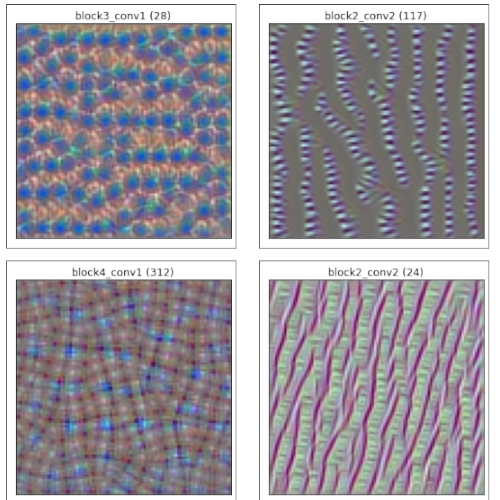

# Downloading the Model

In [1]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt

# Check tensorflow version
print("Tensorflow Version : ",tf.__version__)

Tensorflow Version :  2.17.0


In [2]:
# VGG16 is pretty popular and can be accessed fromm Keras
model = tf.keras.applications.vgg16.VGG16(
    include_top=False, # Final few fully connected layer from the CNN are not going to be included in this model
    weights='imagenet',
    input_shape=(96,96,3) # Row, Column, Channel
)

model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 96, 96, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 96, 96, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 48, 48, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 48, 48, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 24, 24, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 24, 24, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 24, 24, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 12, 12, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 3, 3, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

# Get Layer Output

In [3]:
# If you want to take a look at a specific filter in block 3 conv2, create a sub model which will give an output of that layer
def get_submodel(layer_name):
  return tf.keras.models.Model(
      model.input,
      model.get_layer(layer_name).output
  )

submodel = get_submodel('block3_conv3')
submodel.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 96, 96, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 96, 96, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 48, 48, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 48, 48, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 24, 24, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 24, 24, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 24, 24, 256)         │         590,080 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,735,488 (6.62 MB)

 Trainable params: 1,735,488 (6.62 MB)

 Non-trainable params: 0 (0.00 B)

# Image Visualization

In [4]:
# Using a pre-trained model, the VGG16 model
# Run an image of noise through it and observe what the filter is looking for in the input
def create_image():
  return tf.random.uniform((96,96,3), minval = 0, maxval = 1)

def plot_image(image, title='random'):
  image = image - tf.math.reduce_min(image) # Eliminate all negative values
  image = image / tf.math.reduce_max(image) # Scale it from 0 to 1
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])
  plt.title(title)
  plt.show()



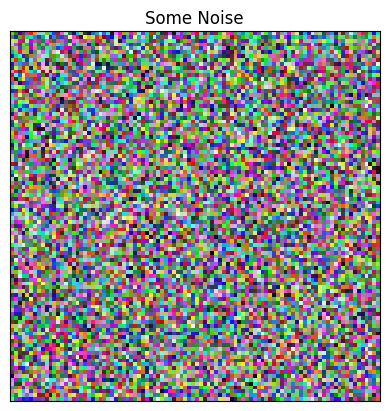

In [5]:
image = create_image()
plot_image(image, title='Some Noise')

# Training Loop

In [6]:
def visualize_filters(layer_name, f_index=None, iterations=50):
  submodel = get_submodel(layer_name)
  num_filters = submodel.output.shape[-1]

  if f_index is None:
    f_index = random.randint(0, num_filters - 1)
  assert num_filters > f_index, 'f_index is out of bounds'

  gen_image = create_image()
  verbose_step = int(iterations/10)

  # Maximize the loss value
  for i in range(0, iterations):
    with tf.GradientTape() as tape:
      tape.watch(gen_image)
      out = submodel(tf.expand_dims(gen_image, axis = 0))[:,:,:,f_index]
      loss = tf.math.reduce_mean(out)
    gradient  = tape.gradient(loss, gen_image)
    gradient = tf.math.l2_normalize(gradient)
    gen_image += gradient*4 # Larger learning rate

    if (i + 1) % verbose_step == 0:
      print(f'Iteration: {i + 1}, Loss : {loss.numpy():.4f}')

  plot_image(gen_image, f'{layer_name}, {f_index}')


# Final Results

In [7]:
print([layer.name for layer in model.layers if 'conv' in layer.name])

['block1_conv1', 'block1_conv2', 'block2_conv1', 'block2_conv2', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block5_conv1', 'block5_conv2', 'block5_conv3']


Iteration: 10, Loss : 0.9697
Iteration: 20, Loss : 1.8285
Iteration: 30, Loss : 2.6874
Iteration: 40, Loss : 3.5463
Iteration: 50, Loss : 4.4052
Iteration: 60, Loss : 5.2641
Iteration: 70, Loss : 6.1230
Iteration: 80, Loss : 6.9819
Iteration: 90, Loss : 7.8408
Iteration: 100, Loss : 8.6997


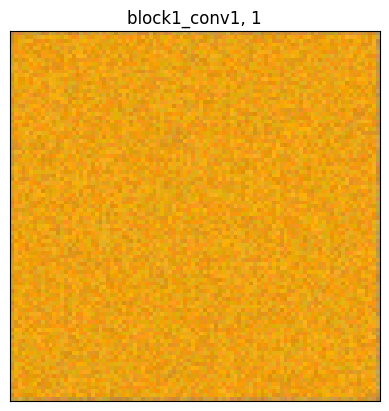

Iteration: 10, Loss : 1.9423
Iteration: 20, Loss : 3.6451
Iteration: 30, Loss : 5.4942
Iteration: 40, Loss : 7.3946
Iteration: 50, Loss : 9.3203
Iteration: 60, Loss : 11.2602
Iteration: 70, Loss : 13.2095
Iteration: 80, Loss : 15.1659
Iteration: 90, Loss : 17.1269
Iteration: 100, Loss : 19.0908


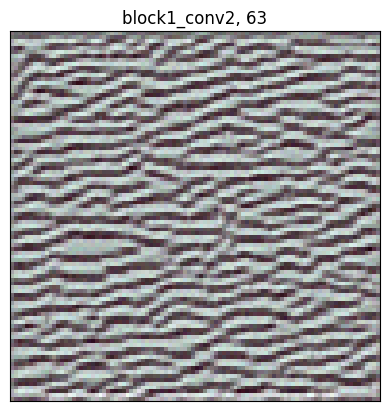

Iteration: 10, Loss : 15.2619
Iteration: 20, Loss : 24.7407
Iteration: 30, Loss : 33.8350
Iteration: 40, Loss : 42.8483
Iteration: 50, Loss : 51.8720
Iteration: 60, Loss : 60.8839
Iteration: 70, Loss : 69.9011
Iteration: 80, Loss : 78.9248
Iteration: 90, Loss : 87.9541
Iteration: 100, Loss : 96.9892


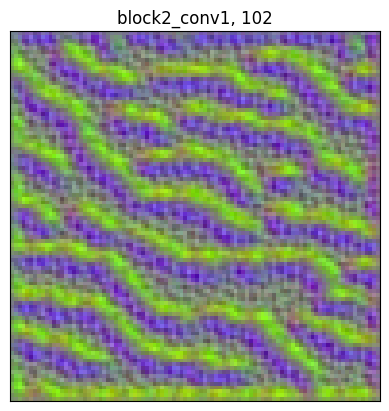

Iteration: 10, Loss : 33.3712
Iteration: 20, Loss : 57.8849
Iteration: 30, Loss : 79.5722
Iteration: 40, Loss : 101.1631
Iteration: 50, Loss : 122.9478
Iteration: 60, Loss : 144.9576
Iteration: 70, Loss : 167.1369
Iteration: 80, Loss : 189.4649
Iteration: 90, Loss : 211.8959
Iteration: 100, Loss : 234.4121


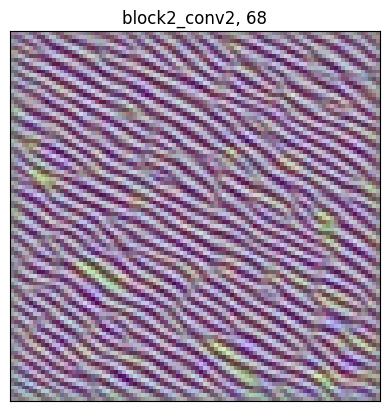

Iteration: 10, Loss : 29.0400
Iteration: 20, Loss : 47.4753
Iteration: 30, Loss : 64.7077
Iteration: 40, Loss : 81.8903
Iteration: 50, Loss : 99.0833
Iteration: 60, Loss : 116.3675
Iteration: 70, Loss : 133.7559
Iteration: 80, Loss : 151.2398
Iteration: 90, Loss : 168.8055
Iteration: 100, Loss : 186.4496


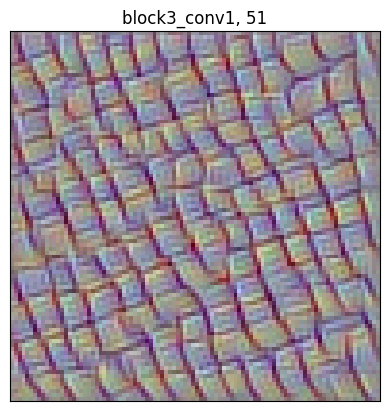

Iteration: 10, Loss : 30.5711
Iteration: 20, Loss : 41.7726
Iteration: 30, Loss : 51.6179
Iteration: 40, Loss : 61.6985
Iteration: 50, Loss : 72.4652
Iteration: 60, Loss : 84.1613
Iteration: 70, Loss : 96.8289
Iteration: 80, Loss : 110.3650
Iteration: 90, Loss : 124.6234
Iteration: 100, Loss : 139.5880


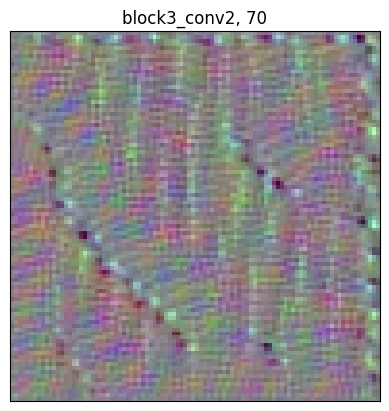

Iteration: 10, Loss : 26.1299
Iteration: 20, Loss : 51.1292
Iteration: 30, Loss : 72.1668
Iteration: 40, Loss : 92.3566
Iteration: 50, Loss : 112.9558
Iteration: 60, Loss : 134.5522
Iteration: 70, Loss : 157.0839
Iteration: 80, Loss : 180.3697
Iteration: 90, Loss : 204.1905
Iteration: 100, Loss : 228.3286


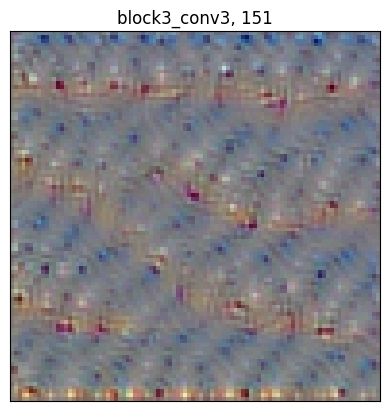

Iteration: 10, Loss : 47.4770
Iteration: 20, Loss : 71.9953
Iteration: 30, Loss : 95.1675
Iteration: 40, Loss : 120.5114
Iteration: 50, Loss : 147.8587
Iteration: 60, Loss : 177.3096
Iteration: 70, Loss : 207.9852
Iteration: 80, Loss : 239.5402
Iteration: 90, Loss : 271.8439
Iteration: 100, Loss : 304.5224


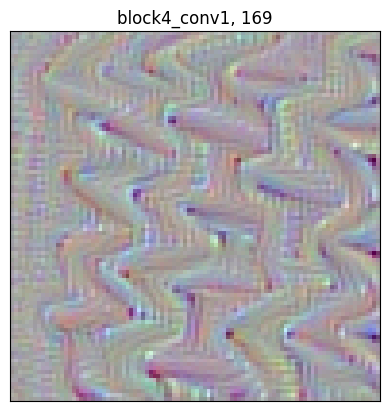

Iteration: 10, Loss : 33.2087
Iteration: 20, Loss : 68.3068
Iteration: 30, Loss : 96.8536
Iteration: 40, Loss : 126.5065
Iteration: 50, Loss : 157.7874
Iteration: 60, Loss : 191.0074
Iteration: 70, Loss : 225.2776
Iteration: 80, Loss : 260.4467
Iteration: 90, Loss : 296.1482
Iteration: 100, Loss : 332.1972


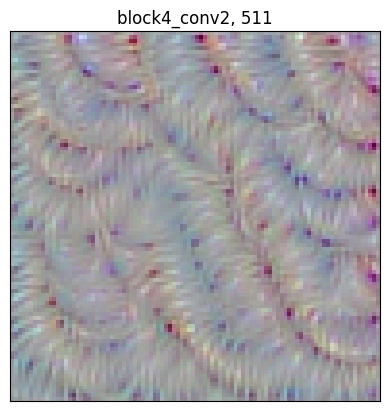

Iteration: 10, Loss : 18.8318
Iteration: 20, Loss : 41.2581
Iteration: 30, Loss : 54.9253
Iteration: 40, Loss : 68.7341
Iteration: 50, Loss : 84.1863
Iteration: 60, Loss : 101.5160
Iteration: 70, Loss : 120.7239
Iteration: 80, Loss : 141.1090
Iteration: 90, Loss : 162.4291
Iteration: 100, Loss : 184.2959


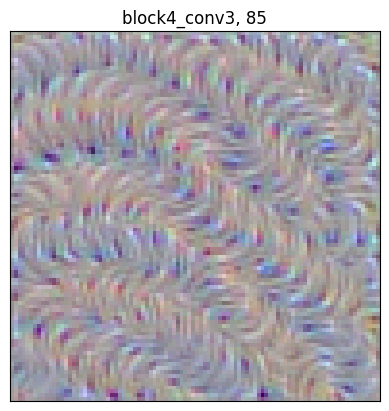

Iteration: 10, Loss : 0.0000
Iteration: 20, Loss : 0.0000
Iteration: 30, Loss : 0.0000
Iteration: 40, Loss : 0.0000
Iteration: 50, Loss : 0.0000
Iteration: 60, Loss : 0.0000
Iteration: 70, Loss : 0.0000
Iteration: 80, Loss : 0.0000
Iteration: 90, Loss : 0.0000
Iteration: 100, Loss : 0.0000


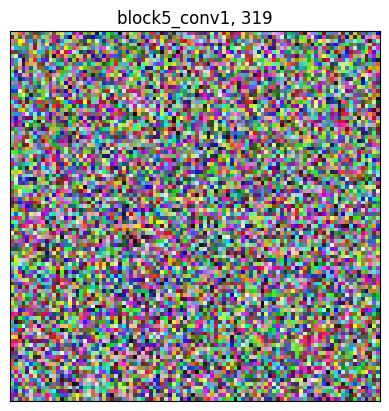

Iteration: 10, Loss : 10.5076
Iteration: 20, Loss : 18.6361
Iteration: 30, Loss : 24.7878
Iteration: 40, Loss : 30.3204
Iteration: 50, Loss : 36.0140
Iteration: 60, Loss : 42.1248
Iteration: 70, Loss : 48.6803
Iteration: 80, Loss : 55.5490
Iteration: 90, Loss : 62.8267
Iteration: 100, Loss : 70.4145


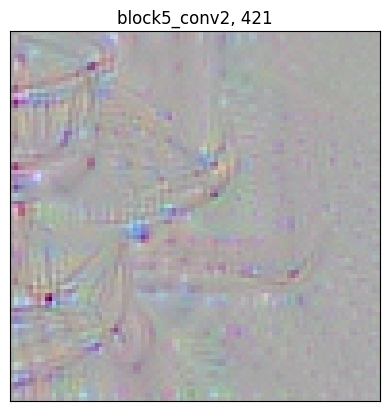

Iteration: 10, Loss : 0.0000
Iteration: 20, Loss : 0.0000
Iteration: 30, Loss : 0.0000
Iteration: 40, Loss : 0.0000
Iteration: 50, Loss : 0.0000
Iteration: 60, Loss : 0.0000
Iteration: 70, Loss : 0.0000
Iteration: 80, Loss : 0.0000
Iteration: 90, Loss : 0.0000
Iteration: 100, Loss : 0.0000


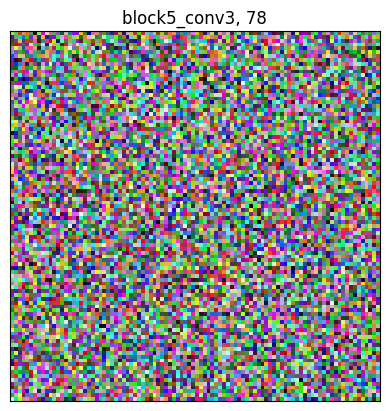

In [9]:
layer_name = 'block1_conv1' #@param ['block1_conv1', 'block1_conv2', 'block2_conv1', 'block2_conv2', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block5_conv1', 'block5_conv2', 'block5_conv3']

layers = ['block1_conv1', 'block1_conv2', 'block2_conv1', 'block2_conv2', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block5_conv1', 'block5_conv2', 'block5_conv3']

# Ther can be some dead filters that can be removed as well, just a thing to know

for layer in layers:
  visualize_filters(layer, iterations=100)